In [57]:
from langchain_community.tools import WikipediaQueryRun,ArxivQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,AIMessage
import os   
import dotenv

In [28]:
api_arxiv_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
api_wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)

arxiv_tool = ArxivQueryRun(api_wrapper=api_arxiv_wrapper)
wikipedia_tool = WikipediaQueryRun(api_wrapper=api_wikipedia_wrapper)

In [29]:

tools = [arxiv_tool, wikipedia_tool]


In [21]:
dotenv.load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [52]:
from langchain_classic.agents import initialize_agent,AgentType
llm = ChatGroq(model = "llama-3.3-70b-versatile",verbose=True,max_tokens=500,api_key=GROQ_API_KEY)
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_error=True
)

In [53]:
agent.invoke({'input':"what is machine learning"})



> Entering new AgentExecutor chain...
To answer the question "what is machine learning", I need to find a reliable source that provides a comprehensive definition and explanation of the concept.

Action: wikipedia
Action Input: machine learning
Observation: Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
Thought:Based on the observation from Wikipedia, I have a general understanding of what machine learning is. However, I think it would be beneficial to explore more technical and academic aspects of machine learning to provide a more compr

{'input': 'what is machine learning',
 'output': 'Machine learning is a field of study in artificial intelligence that focuses on the development and application of statistical algorithms that can learn from data and generalize to unseen data, allowing them to perform tasks without explicit instructions. It encompasses various techniques, including deep learning, neural networks, and variational autoencoders, and has numerous applications in areas such as computer vision, natural language processing, and decision-making.'}

In [54]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph import add_messages

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

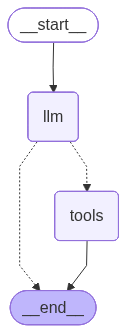

In [58]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode 
from langgraph.prebuilt import tools_condition

def tools_calling_llm(state: State):
    result = agent.invoke(state["messages"])
    return {"messages": [AIMessage(content=result["output"])]}



builder = StateGraph(State)
builder.add_node("llm",tools_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"llm")
builder.add_conditional_edges(
    'llm',
    tools_condition
)
builder.add_edge("tools",END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [59]:

messages = graph.invoke(
    {"messages": [HumanMessage(content="1706.03762")]},
    config={"return_intermediate_steps": True}
)
for msg in messages["messages"]:
    msg.pretty_print()



> Entering new AgentExecutor chain...
Thought: The input question appears to be a reference to a specific article on arxiv.org, indicated by the string '1706.03762', which seems to be an identifier for an article. To find more information about this article, I should search for it on arxiv.org.

Action: arxiv
Action Input: 1706.03762
Observation: Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base
Thought:Thought: I have found the article '1706.03762' on arxiv.org, and it appears to be a seminal paper in the field of natural language processin